##  Packages

In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [2]:
using DynamicalSystems, CairoMakie,  DifferentialEquations
using StaticArrays

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2,  el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [17]:
integrator_setting = (alg = Vern9(), adaptive = false, dt = 0.001);

In [18]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1, k2 = -0.17, -0.17;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2,  el_link]


p = [a, b, c, d, s, xr, r, I, xv, k1, k2, el_link]
ds_HR1 = CoupledODEs(HR,  condition1, p, diffeq = integrator_setting)
ds_HR2 = CoupledODEs(HR,  condition2, p, diffeq = integrator_setting );

In [19]:
ds_HR1

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  HR
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, -0.17, 0.0]
 time:          0.0
 state:         [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]


In [20]:
ds_HR2

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  HR
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, -0.17, 0.0]
 time:          0.0
 state:         [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]


In [26]:
tr, _ = trajectory(ds_HR1, 5000, Δt = integrator_setting.dt)

xsum = tr[:, 1] + tr[:, 4]
xsum = xsum[floor(Int, length(xsum) / 2):end ];
x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

In [31]:
tr1, _ = trajectory(ds_HR2, 5000, Δt = integrator_setting.dt)

xsum1 = tr1[:, 1] + tr1[:, 4]
xsum1 = xsum1[floor(Int, length(xsum1) / 2):end ];
x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11 = z11[floor(Int, length(z11) / 2):end ];

In [27]:
CairoMakie.activate!()

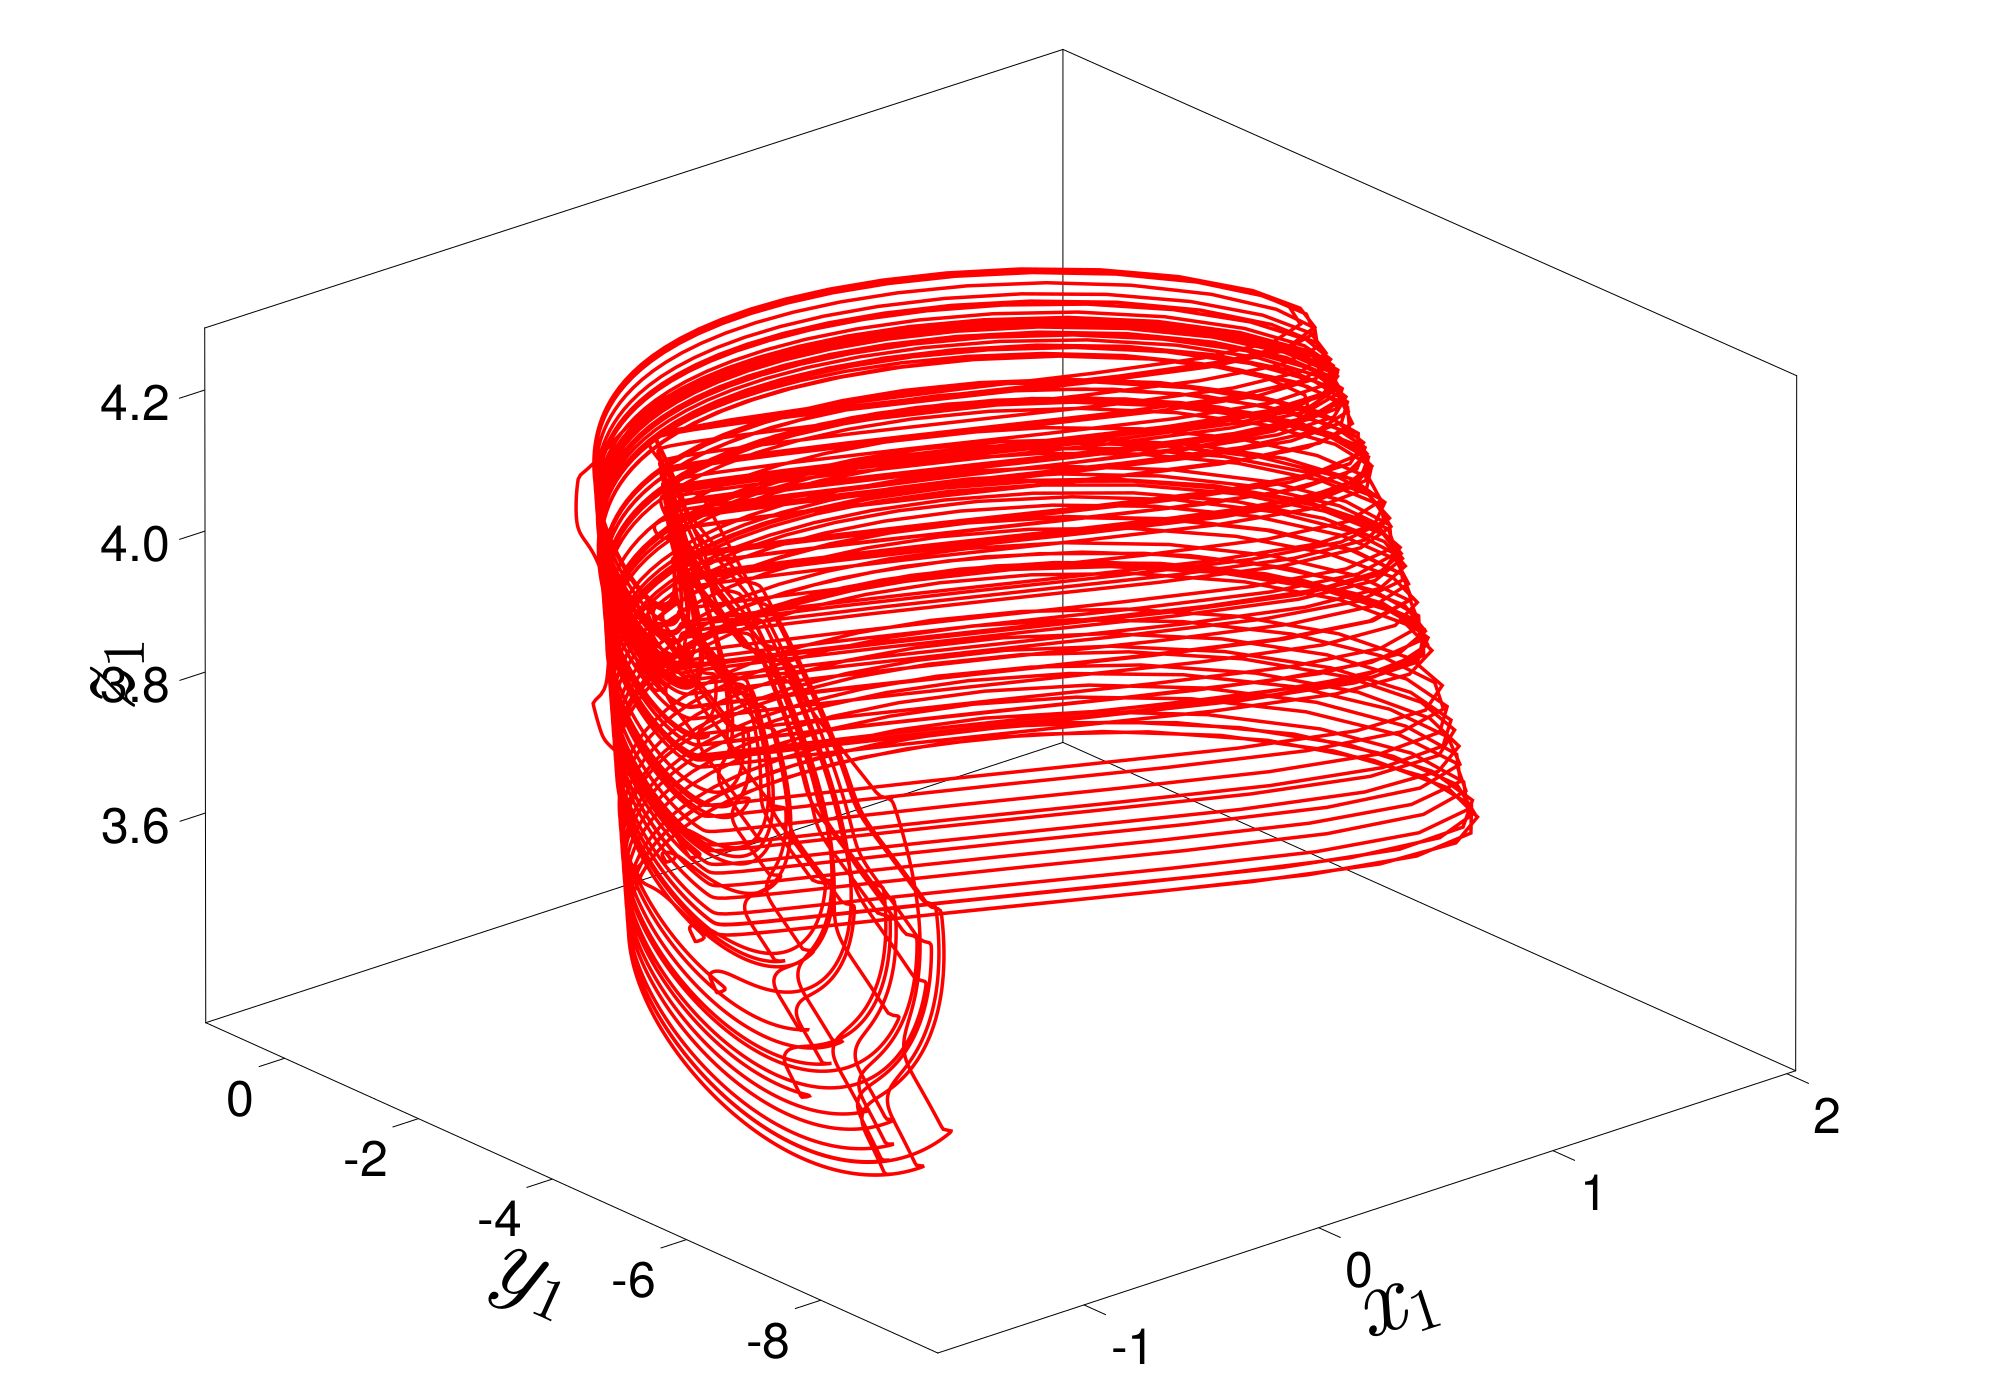

In [13]:
f = Figure(resolution = (2000, 1400))
ts, tf = 20000, 40000

ax = Axis3(f[1, 1],
xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 100, ylabelsize = 100, zlabelsize = 100,
xticklabelsize = 50, yticklabelsize = 50, zticklabelsize = 50,
zticks = range(3.6, 4.2, step = 0.2))

ax.xgridvisible = false
ax.ygridvisible = false
ax.zgridvisible = false
lines!(ax, x1[ts:tf], y1[ts:tf], z1[ts:tf], linewidth = 3.5, color = "red" )

#save("red_at_0051.eps", f)
f

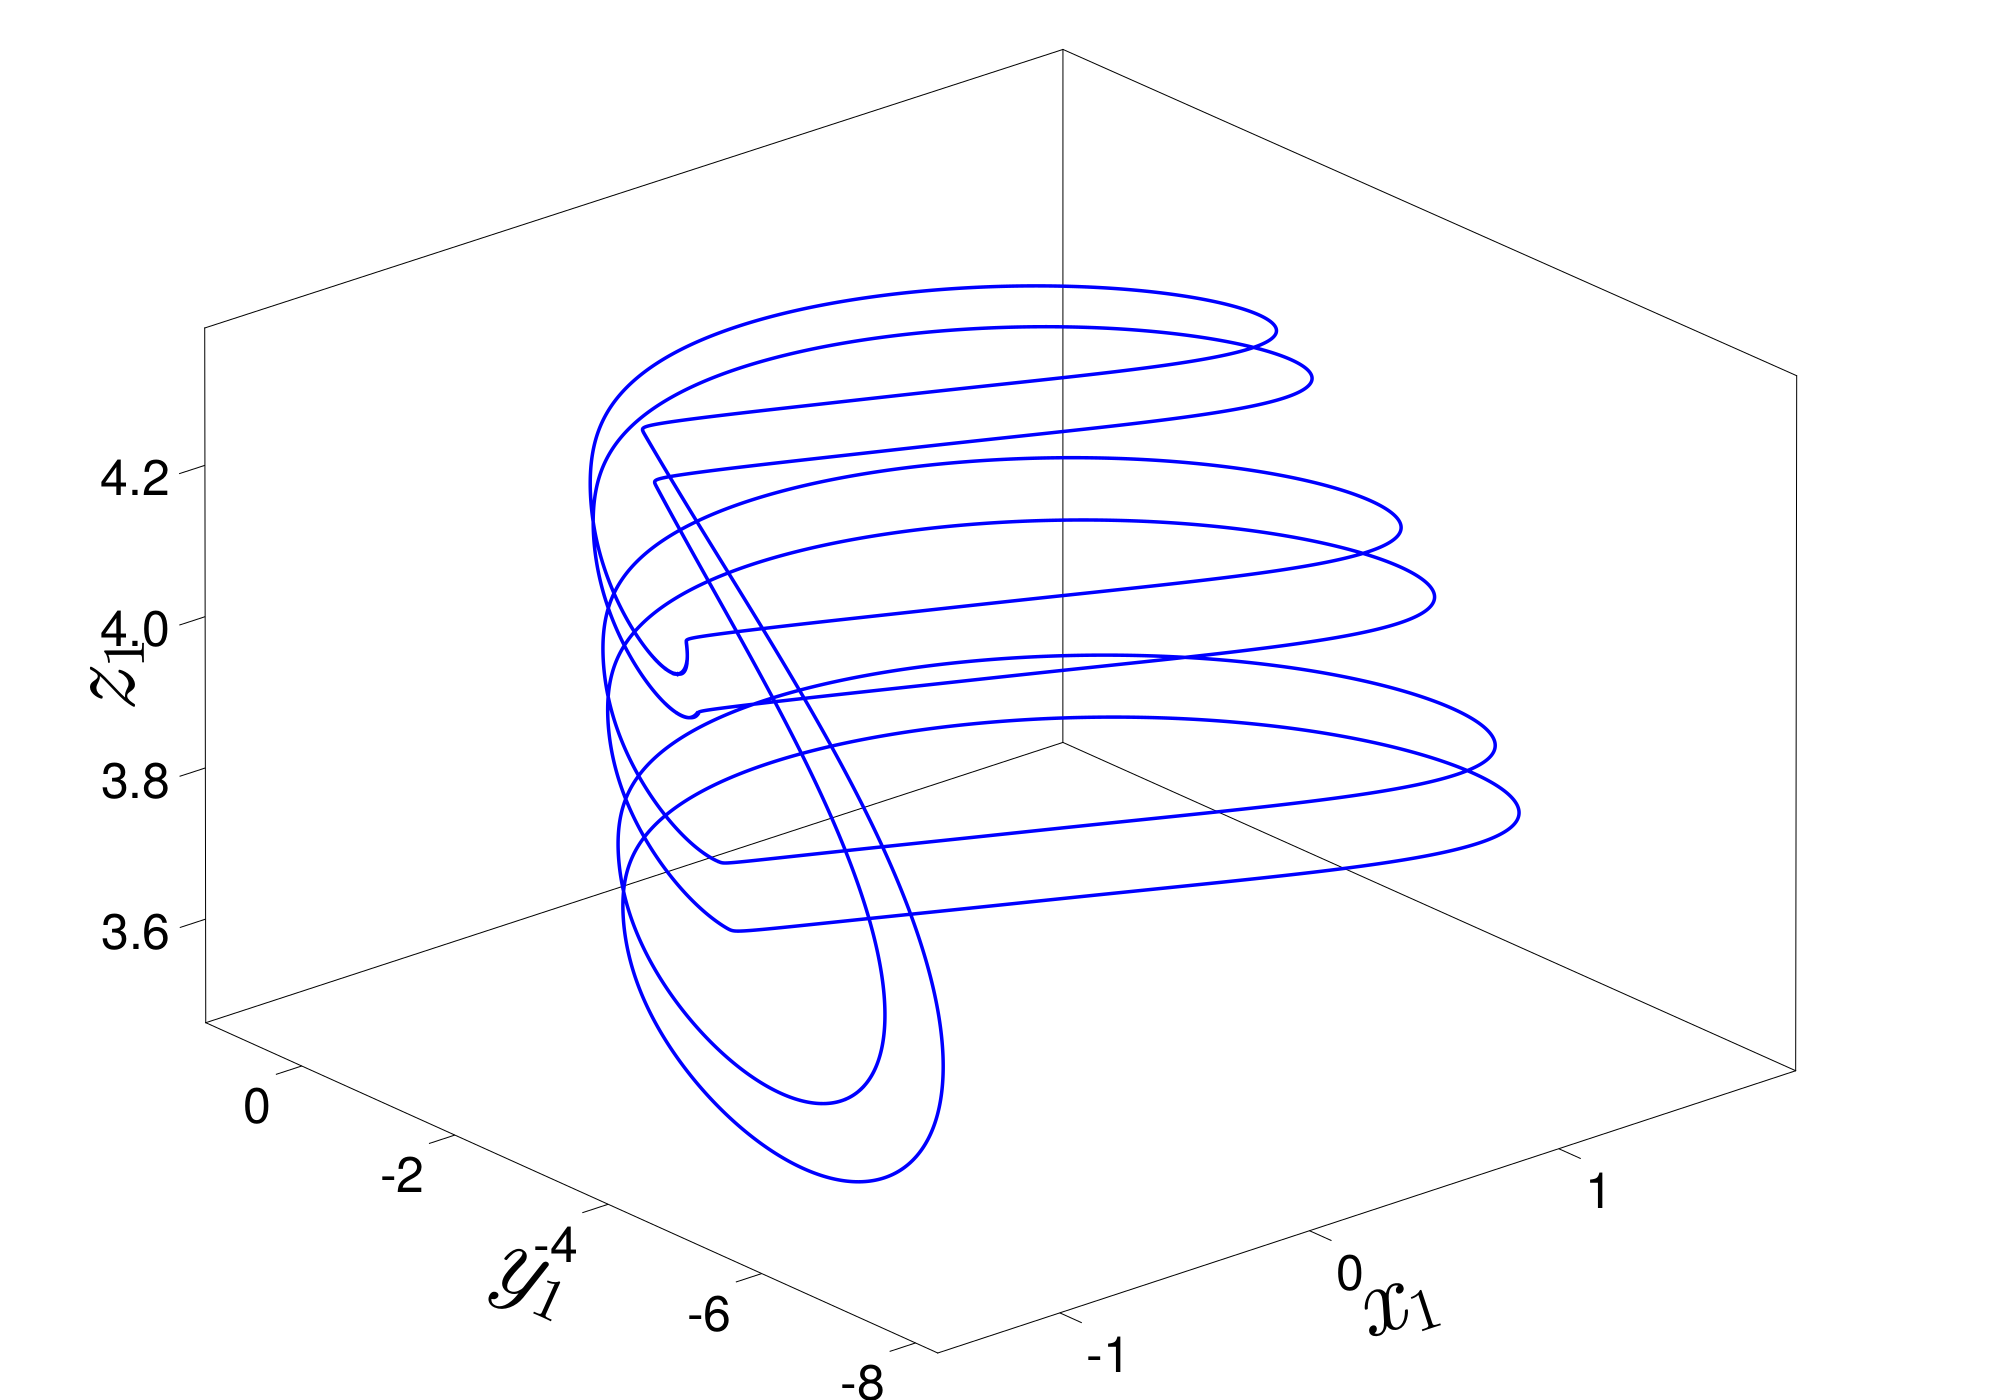

In [33]:
f = Figure(resolution = (2000, 1400))
ts, tf = 20000, 500000

ax = Axis3(f[1, 1],
xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 100, ylabelsize = 100, zlabelsize = 100,
xticklabelsize = 50, yticklabelsize = 50, zticklabelsize = 50,
zticks = range(3.6, 4.2, step = 0.2))

ax.xgridvisible = false
ax.ygridvisible = false
ax.zgridvisible = false

lines!(ax, x11[ts:tf], y11[ts:tf], z11[ts:tf], linewidth = 3.5, color = "blue" )
#save("blue_at_0051.eps", f)
f

In [34]:
using GLMakie
GLMakie.activate!()

In [37]:
f = Figure(resolution = (2000, 1400))
ts, tf = 2000000, 2100000
ax = LScene(f[1, 1])
lines!(ax, x11[ts:tf], y11[ts:tf], z11[ts:tf], linewidth = 3.5, color = "blue" )
display(f)

GLMakie.Screen(...)

In [39]:
f = Figure(resolution = (600, 600))
ts, tf = 2000000, 2500000
ax = Axis(f[1, 1])
lines!(ax, x11[ts:tf], z11[ts:tf], linewidth = 3.5, color = "blue" )
display(f)

GLMakie.Screen(...)

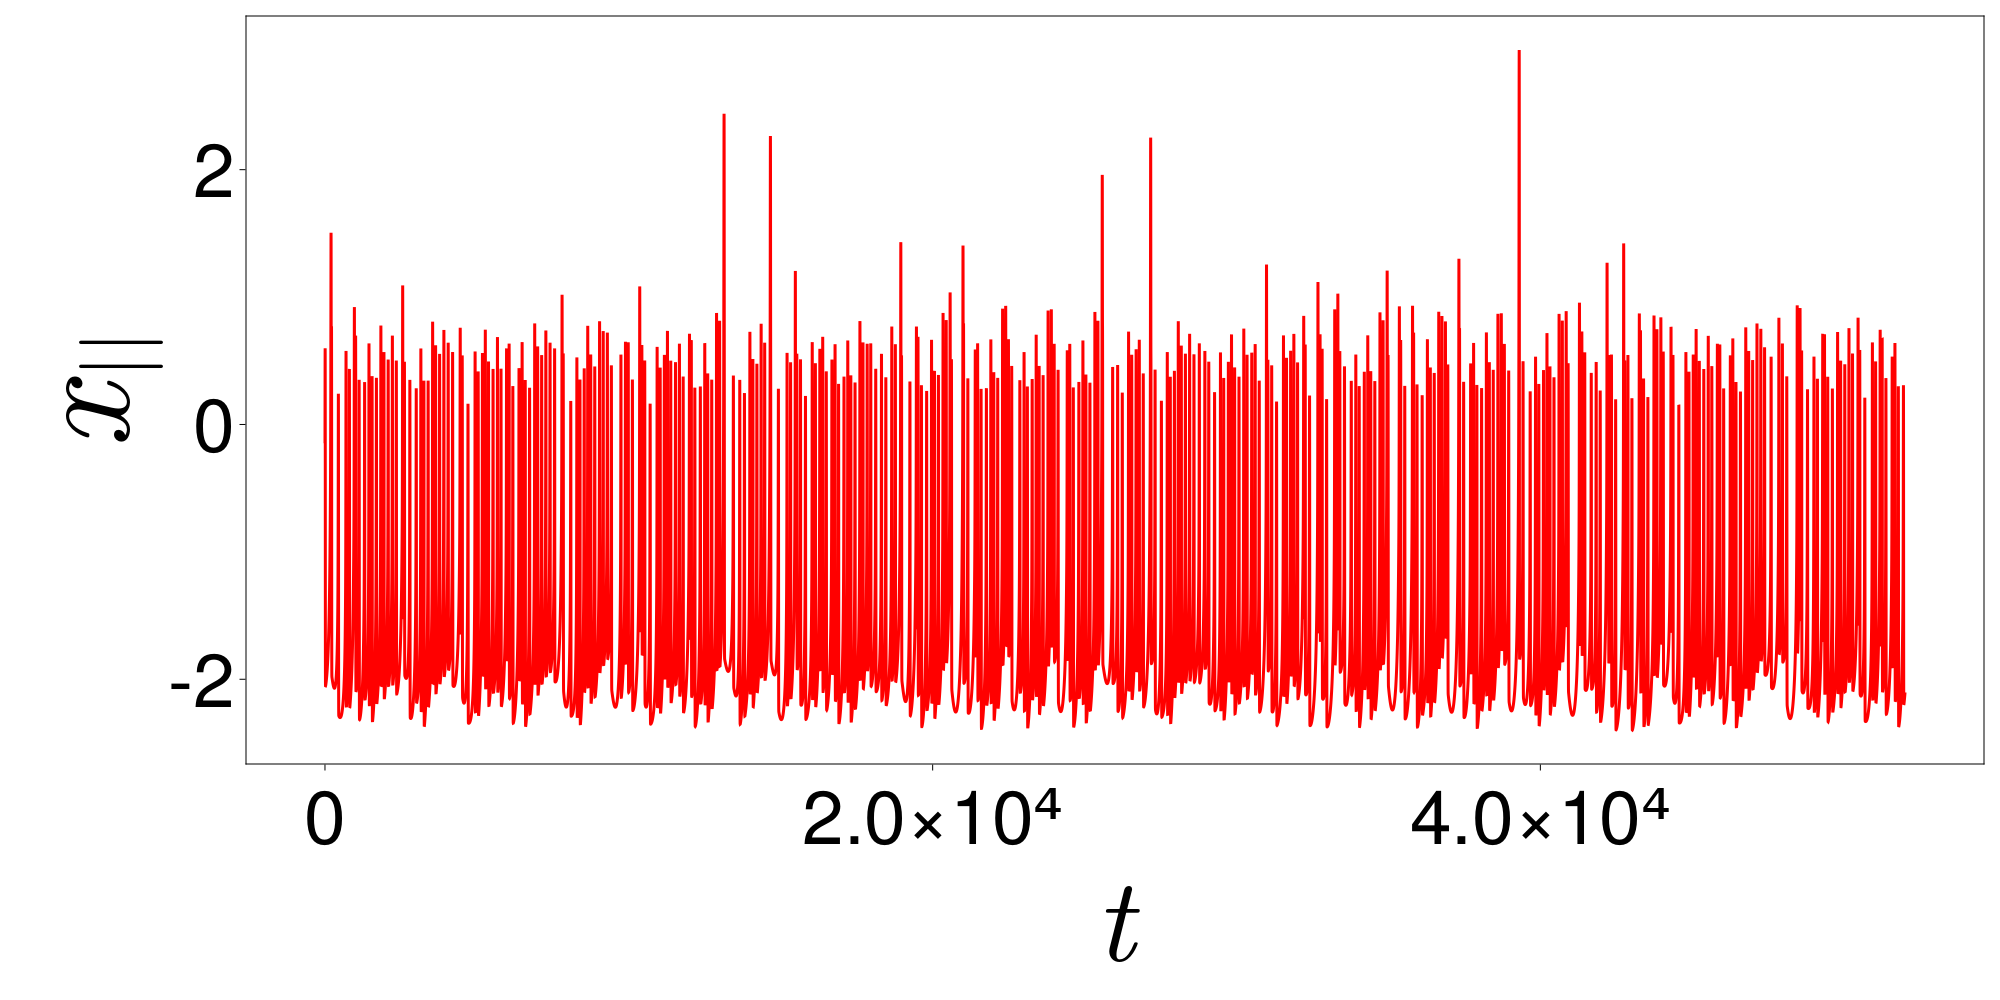

In [15]:
f = Figure(resolution = (2000, 1000))

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{||}",
xlabelsize = 120, ylabelsize = 140,
                xticklabelsize = 75, yticklabelsize = 75)
ax.xgridvisible = false
ax.ygridvisible = false
lines!(ax, xsum[80000:132000], linewidth = 3.0, color = "red")

#save("red_timesries_0051.eps", f)
f

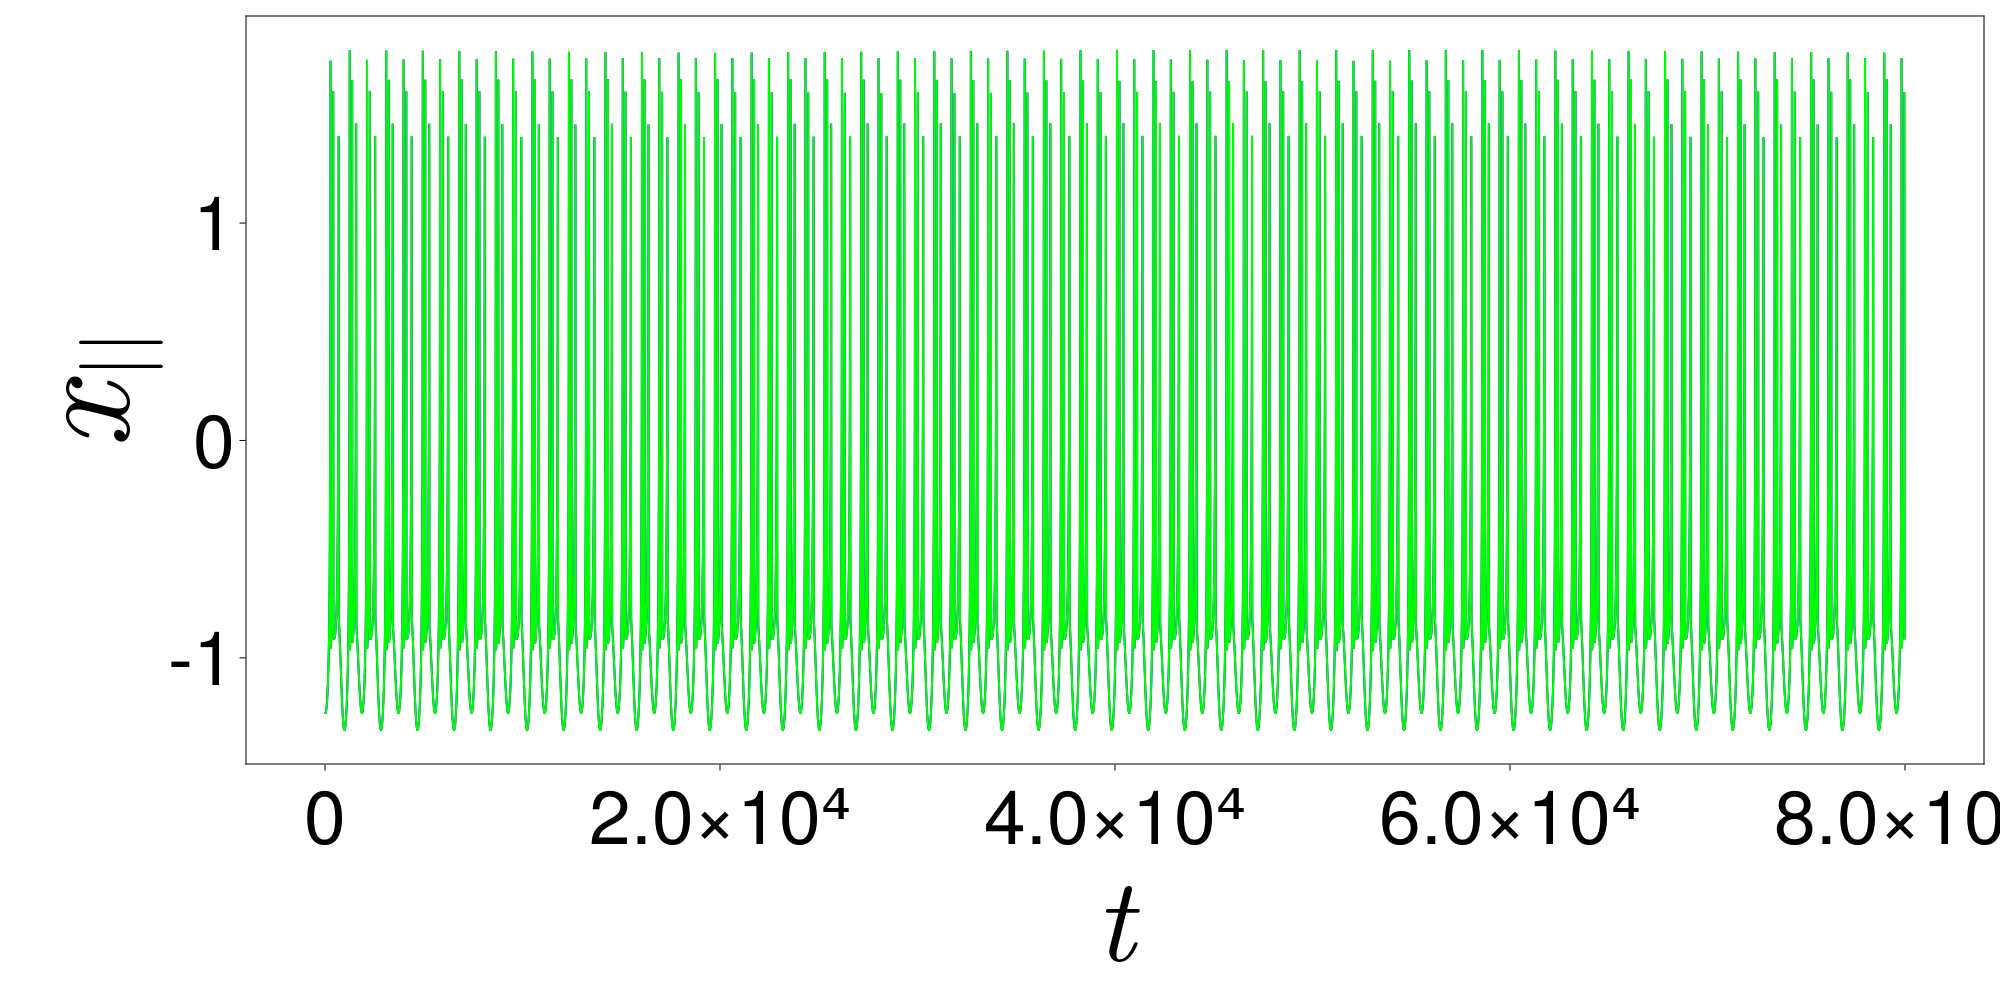

In [16]:
f = Figure(resolution = (2000, 1000))

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{||}",
xlabelsize = 120, ylabelsize = 140,
                xticklabelsize = 75, yticklabelsize = 75)

ax.xgridvisible = false
ax.ygridvisible = false

lines!(ax, tr1[:, 4][20000:100000], linewidth = 2.0, color = "blue")
lines!(ax, tr1[:, 1][20000:100000], linewidth = 2.0, color = "lime")
#save("blue_timesries_0051.eps", f)
f

In [17]:
lyapunovspectrum(ds_HR1, 300000; Ttr = 150000)

6-element Vector{Float64}:
   0.015048268524913576
   0.005581866846570182
   9.66652809913531e-6
  -0.027423744955744078
  -6.420325534505189
 -11.535716423448902

In [18]:
lyapunovspectrum(ds_HR2, 300000; Ttr = 150000)

6-element Vector{Float64}:
  0.09778587384444064
  0.014980245484808476
  2.7151734142803215e-6
 -0.004386572040632717
 -8.803368093390675
 -8.828190010313605